# Chapter 06 비지도 학습

### 06-1 군집 알고리즘

- 비지도 학습 : 타깃 (정답)이 없는 머신러닝 알고리즘

In [3]:
# 데이터 다운로드
!wget https://bit.ly/fruits_300_data -O fruits_300.npy

--2021-07-12 05:06:06--  https://bit.ly/fruits_300_data
Resolving bit.ly (bit.ly)... 67.199.248.11, 67.199.248.10
Connecting to bit.ly (bit.ly)|67.199.248.11|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: https://github.com/rickiepark/hg-mldl/raw/master/fruits_300.npy [following]
--2021-07-12 05:06:06--  https://github.com/rickiepark/hg-mldl/raw/master/fruits_300.npy
Resolving github.com (github.com)... 140.82.121.4
Connecting to github.com (github.com)|140.82.121.4|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/rickiepark/hg-mldl/master/fruits_300.npy [following]
--2021-07-12 05:06:06--  https://raw.githubusercontent.com/rickiepark/hg-mldl/master/fruits_300.npy
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.111.133, 185.199.110.133, 185.199.108.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.111.133|:443... conne

In [4]:
import numpy as np
import matplotlib.pyplot as plt

fruits = np.load('fruits_300.npy')  # np.load(file): 넘파이에서 파일 로드하는 방법

In [7]:
print(fruits.shape)

# 300: 과일수, 이미지 너비 (100x100)

(300, 100, 100)


[  1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   2   1
   2   2   2   2   2   2   1   1   1   1   1   1   1   1   2   3   2   1
   2   1   1   1   1   2   1   3   2   1   3   1   4   1   2   5   5   5
  19 148 192 117  28   1   1   2   1   4   1   1   3   1   1   1   1   1
   2   2   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1
   1   1   1   1   1   1   1   1   1   1]


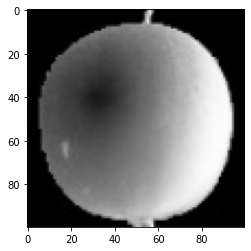

In [13]:
print(fruits[0,0,:])  # 첫번째 이미지의 첫 행 출력
plt.imshow(fruits[0], cmap='gray')  # 사과
plt.show()

# 각 픽셀은 0~255까지의 정수로 표현
# 밝은 부분은 0에 가깝고, 짙은 부분은 255에 가깝다

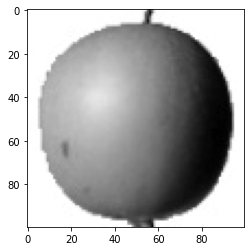

In [15]:
plt.imshow(fruits[0], cmap='gray_r')    # 이미지 반전
plt.show()

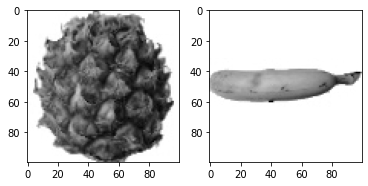

In [21]:
fig, axs = plt.subplots(1,2)   # subplots(rows, cols): 여러 개의 그래프를 배열처럼 쌓을 수 있다
axs[0].imshow(fruits[100], cmap='gray_r')   # 100~199 : 파인애플
axs[1].imshow(fruits[200], cmap='gray_r')   # 200~299 : 바나나
# axs[n] : n번째에 그림
plt.show()

In [25]:
apple = fruits[0:100].reshape(-1, 100*100)
pineapple = fruits[100:200].reshape(-1, 100*100)
banana = fruits[200:300].reshape(-1, 100*100)

print(apple.shape)

(100, 10000)


In [27]:
print(apple.mean(axis=1))   # 사과 100개 이미지에 대한 픽셀 평균값

[ 88.3346  97.9249  87.3709  98.3703  92.8705  82.6439  94.4244  95.5999
  90.681   81.6226  87.0578  95.0745  93.8416  87.017   97.5078  87.2019
  88.9827 100.9158  92.7823 100.9184 104.9854  88.674   99.5643  97.2495
  94.1179  92.1935  95.1671  93.3322 102.8967  94.6695  90.5285  89.0744
  97.7641  97.2938 100.7564  90.5236 100.2542  85.8452  96.4615  97.1492
  90.711  102.3193  87.1629  89.8751  86.7327  86.3991  95.2865  89.1709
  96.8163  91.6604  96.1065  99.6829  94.9718  87.4812  89.2596  89.5268
  93.799   97.3983  87.151   97.825  103.22    94.4239  83.6657  83.5159
 102.8453  87.0379  91.2742 100.4848  93.8388  90.8568  97.4616  97.5022
  82.446   87.1789  96.9206  90.3135  90.565   97.6538  98.0919  93.6252
  87.3867  84.7073  89.1135  86.7646  88.7301  86.643   96.7323  97.2604
  81.9424  87.1687  97.2066  83.4712  95.9781  91.8096  98.4086 100.7823
 101.556  100.7027  91.6098  88.8976]


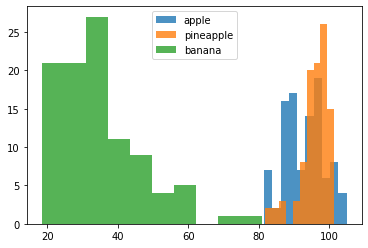

In [38]:
# plt.hist()로 히스토그램 그리기
plt.hist(np.mean(apple, axis=1), alpha=0.8)      # alpha매개변수: 투명도를 조정 (1이면 제일 짙게)
plt.hist(np.mean(pineapple, axis=1), alpha=0.8)
plt.hist(np.mean(banana, axis=1), alpha=0.8)

plt.legend(['apple','pineapple','banana'])      # 범례 표현
plt.show()

# 바나나는 확실히 구분, but 사과와 파인애플은 구분x

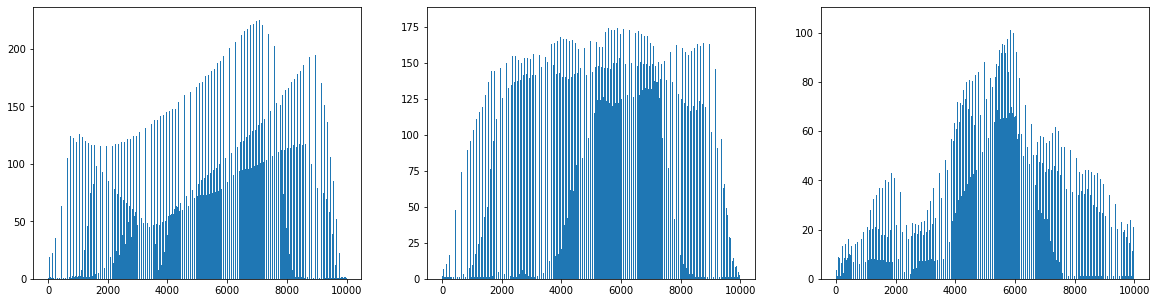

In [39]:
fig, axs = plt.subplots(1, 3, figsize=(20,5))
axs[0].bar(range(10000), np.mean(apple, axis=0))    # 각 과일의 각 픽셀(10000개의 픽셀)에 대한 평균
axs[1].bar(range(10000), np.mean(pineapple, axis=0))
axs[2].bar(range(10000), np.mean(banana, axis=0))
plt.show()

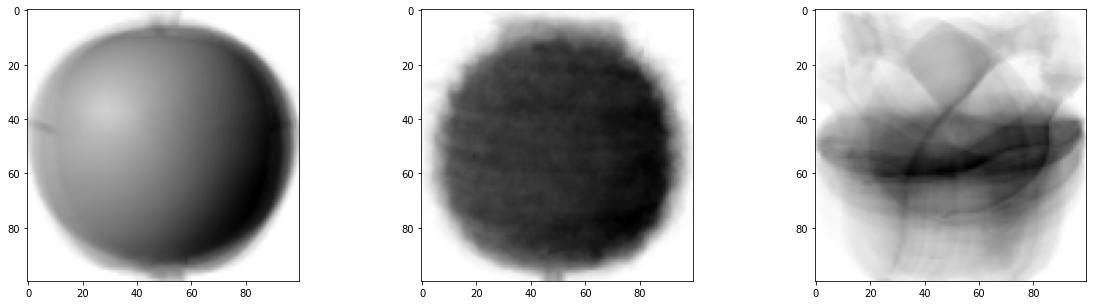

In [44]:
# 위 그래프를 100x100 크기로 바꿔서 이미지처럼 출력하기
apple_mean = np.mean(apple, axis=0).reshape(100,100)
pineapple_mean = np.mean(pineapple, axis=0).reshape(100,100)
banana_mean = np.mean(banana, axis=0).reshape(100,100)
fig, axs = plt.subplots(1, 3, figsize=(20, 5))
axs[0].imshow(apple_mean, cmap='gray_r')
axs[1].imshow(pineapple_mean, cmap='gray_r')
axs[2].imshow(banana_mean, cmap='gray_r')
plt.show()

In [52]:
abs_diff = np.abs(fruits - apple_mean)  # 각 픽셀에 대한 절댓값 오차 계산
print(abs_diff.shape)
abs_mean = np.mean(abs_diff, axis=(1,2)) # 절댓값 오차에 대한 평균
print(abs_mean.shape)

(300, 100, 100)
(300,)


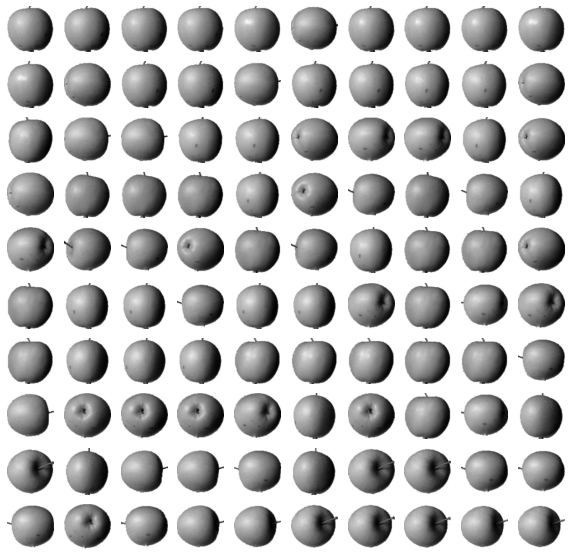

In [57]:
apple_index = np.argsort(abs_mean)[:100]    # 절댓값 오차의 평균이 제일 작은 100개 선택
fig, axs = plt.subplots(10, 10, figsize=(10,10))
for i in range(10):
    for j in range(10):
        axs[i,j].imshow(fruits[apple_index[i*10 + j]], cmap='gray_r')
        axs[i,j].axis('off')
plt.show()

- 군집 : 비슷한 샘플끼리 그룹으로 모으는 작업

- 클러스터 : 군집 알고리즘에서 만든 그룹

### 06-2 k-평균

앞선 작업은 사과, 파인애플, 바나나 사진임을 미리 알고 있었기 때문에 각 과일의 평균을 구할 수 있었으나, 

진짜 비지도 학습에서는 그렇지 않다.

---

--> **k-평균** 군집 알고리즘이 평균값을 자동으로 찾아준다.

이 평균값이 클러스터의 중심에 위치하기 때문에 **클러스터 중심**, 또는 **센트로이드**라고 부른다

작동 방식

1. 무작위로 k개의 클러스터 중심을 정한다

2. 각 샘플에서 가장 가까운 클러스터 중심을 찾아 해당 클러스터의 샘플로 지정

3. 클러스터에 속한 샘플의 평균값으로 클러스터 중심 변경

4. 클러스터 중심에 변화가 없을 때까지 2번으로 돌아가 반복

In [58]:
import numpy as np
fruits = np.load('fruits_300.npy')
fruits_2d = fruits.reshape(-1, 100*100)

In [59]:
from sklearn.cluster import KMeans   # 사이킷런의 k-평균 알고리즘
km = KMeans(n_clusters=3, random_state=42)  # n_clusters : 클러스트의 개수 지정
km.fit(fruits_2d)   # 비지도 학습이므로 타깃데이터 사용X

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=42, tol=0.0001, verbose=0)

In [60]:
print(km.labels_)   # labels_ : 군집된 결과를 저장

[0 0 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 2 0 2 0 0 0 0 0 0 0 2 0 0 0 0 0 0 0 0 0 2 2 0 0 0 0 0 0 0 0 2 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0 0 0 0 0 0 0 0 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1]


In [63]:
print(np.unique(km.labels_, return_counts=True))

(array([0, 1, 2], dtype=int32), array([ 91,  98, 111]))


In [65]:
import matplotlib.pyplot as plt
def draw_fruits(arr, ratio=1):
    n = len(arr)    # n: 샘플 수
    rows = int(np.ceil(n/10))   # ceil(): 숫자 올림
    # 한 줄에 10개씩 이미지를 그림
    cols = n if rows < 2 else 10
    # rows가 1이면 열의 개수는 샘플 개수, 아니면 10개
    fig, axs = plt.subplots(rows, cols, figsize=(cols*ratio, rows*ratio), squeeze=False)
    # figsize는 입력받은 ratio에 비례해서 커진다

    for i in range(rows):
        for j in range(cols):
            if i*10 + j < n:
                axs[i,j].imshow(arr[i*10 + j], cmap='gray_r')
            axs[i,j].axis('off')
    plt.show()

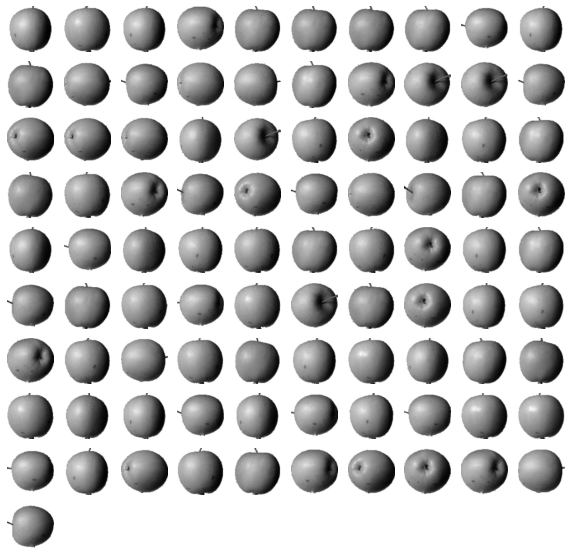

In [67]:
draw_fruits(fruits[km.labels_==0])  # 불리언 인덱싱 (label이 0인 이미지들 그리기)

# 사과

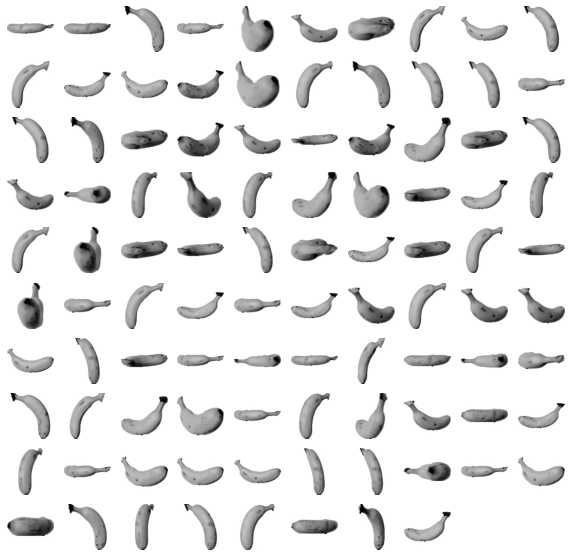

In [68]:
draw_fruits(fruits[km.labels_==1])  # 바나나

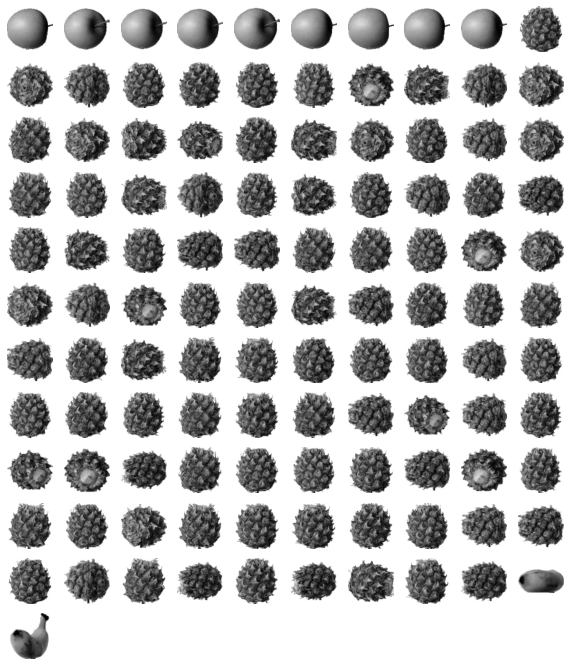

In [69]:
draw_fruits(fruits[km.labels_==2])  # 파인애플

클러스터 중심

(3, 10000)


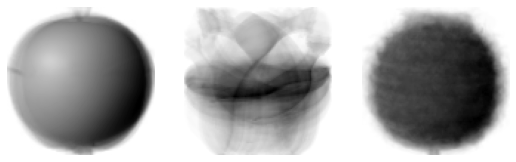

In [75]:
print(km.cluster_centers_.shape)
draw_fruits(km.cluster_centers_.reshape(-1,100,100), ratio=3)

# cluster._centers_ : 최종적으로 찾은 클래스터 중심이 저장되어 있다

In [78]:
print(km.transform(fruits_2d[100:101]))  # 2차원 배열로 전달하기 위해 슬라이싱 연산자 사용

# transform(): 훈련데이터 샘플에서 클러스터 중심까지의 거리로 변환

[[5267.70439881 8837.37750892 3393.8136117 ]]


In [80]:
print(km.predict(fruits_2d[100:101]))   # predict(): 가장 클러스터 중심을 예측 클래스로 출력
# 파인애플로 예측

[2]


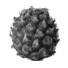

In [82]:
draw_fruits(fruits[100:101])

In [84]:
print(km.n_iter_)   # 최적의 클러스트를 찾기 위해 클러스터 중심을 옮긴 횟수
# (알고리즘이 반복한 횟수를 뜻함)

3


k-평균 알고리즘의 단점은 클러스터 개수를 사전에 지정해야 한다는 것이다.

적절한 k 값을 찾는 방법:

- 엘보우 방법:

 클러스터 개수를 늘려가면서 이너셔의 변화를 관찰하여 최적의 k를 찾는 방법

 - 이너셔 : (클러스터 중심과 클러스터에 속한 샘플 사이의 거리)의 제곱 합

 그래프로 이것을 그리면 감소하는 속도가 꺾이는 지점이 있다.

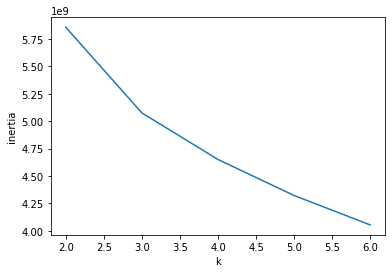

In [85]:
inertia = []
for k in range(2, 7):   # 클러스터의 개수를 2~6까지 바꿔가며 5번 훈련하여 inertia_ 속성에 저장된 이너셔값 출력
    km = KMeans(n_clusters=k, random_state=42)
    km.fit(fruits_2d)
    inertia.append(km.inertia_)
plt.plot(range(2,7), inertia)
plt.xlabel('k')
plt.ylabel('inertia')
plt.show()

# 그래프에서 k=3에서 기울기가 조금 바뀐다!

### 6-3 주성분 분석

너무 많은 사진이 등록되어 저장 공간이 부족하다..

차원 축소:

데이터를 가장 잘 나타내는 일부 특성을 선택하여 데이터 크기를 줄이고 지도 학습 모델의 성능을 향상시킬 수 있는 방법

**주성분 분석** ( PCA ) : 

데이터에 있는 분산이 큰 방향을 찾는 것

- 주성분 : 분산이 큰 방향으로 뻗는 벡터

 주성분의 원소 개수는 원본 데이터셋에 있는 특성 개수이다. --> 이것을 차원축소

일반적으로 주성분은 원본 특성의 개수만큼 찾을 수 있다.

In [86]:
import numpy as np
fruits = np.load('fruits_300.npy')
fruits_2d = fruits.reshape(-1, 100*100)

In [105]:
# PCA 클래스
from sklearn.decomposition import PCA
pca = PCA(n_components=50)  # PCA 객체를 만들 때, n_components에 주성분의 개수를 지정해야 한다
pca.fit(fruits_2d)

PCA(copy=True, iterated_power='auto', n_components=50, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

In [106]:
print(pca.components_.shape)  # components_ : PCA 클래스가 찾은 주성분이 저장되어 있다

(50, 10000)


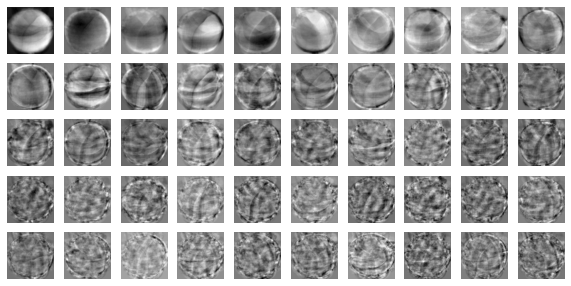

In [107]:
draw_fruits(pca.components_.reshape(-1, 100, 100))

이 주성분은 원본 데이터에서 가장 분산이 큰 방향을 순서대로 나타낸 것이다.

주성분을 찾았으므로 원본 데이터를 주성분에 투영하여 특성의 개수를 10,000개에서 50개로 줄일 수 있다.

--> 저장 공간을 1/200 로 줄일 수 있다. ( 어느 정도 손실이 날 수 밖에 없다 )

In [108]:
print(fruits_2d.shape)

(300, 10000)


In [110]:
fruits_pca = pca.transform(fruits_2d)  # 주성분에 투영하여 특성의 개수를 10000개에서 50개로 줄인다
print(fruits_pca.shape)

# fruits_pca : 50개의 특성을 가진 데이터가 되었다.

(300, 50)


원본 데이터 재구성

In [112]:
# 축소한 차원을 inverse_transform()으로 원상태로 복원
fruits_inverse = pca.inverse_transform(fruits_pca)
print(fruits_inverse.shape)

(300, 10000)


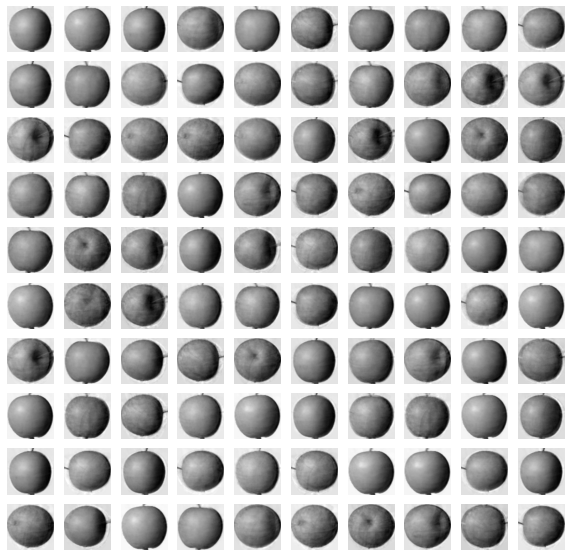

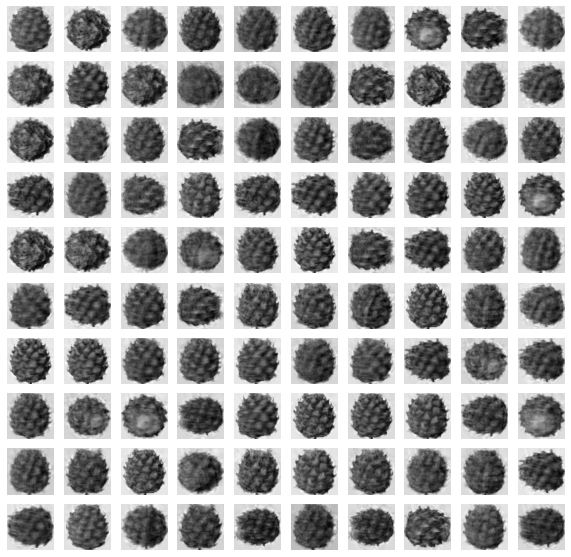

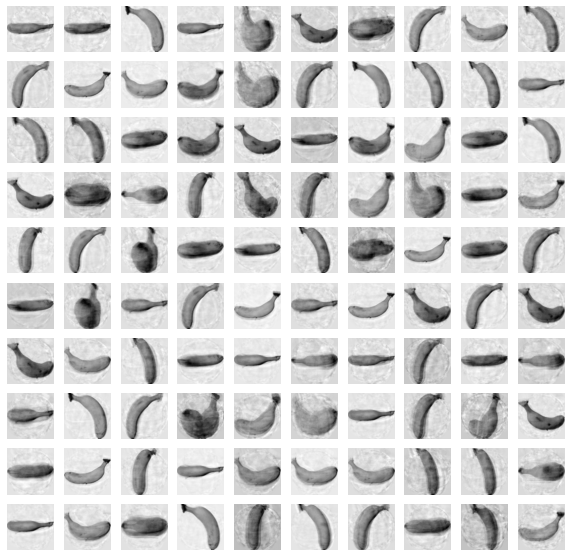

In [115]:
# 복원된 과일 이미지 출력
fruits_reconstruct = fruits_inverse.reshape(-1, 100, 100)
for start in [0, 100, 200]:
    draw_fruits(fruits_reconstruct[start:start+100])
    print()

# 거의 모든 과일이 잘 복원되었다!

**설명된 분산**:

주성분이 원본 데이터의 분산을 얼마나 잘 나타내는지 기록한 값

PCA 클래스의 explained_variance_ratio 에 각 주성분의 설명된 분산 비율이 기록되어 있다.

In [116]:
print(np.sum(pca.explained_variance_ratio_))

# 92%가 넘는 분산을 유지하고 있다

0.9215489990699862


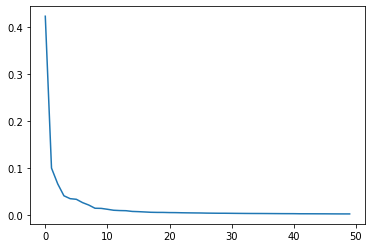

In [117]:
plt.plot(pca.explained_variance_ratio_)
plt.show()

# 처음 10개의 주성분이 대부분의 분산을 표현하고 있다!

(1) 과일사진 원본 데이터와, (2) PCA로 축소한 데이터를 지도학습에 적용

In [118]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression()   # 3개의 과일사진을 분류하는 로지트식 회귀모델 사용

In [119]:
target = np.array([0]*100 + [1]*100 + [2]*100)  # 타깃값 생성

In [120]:
# 원본 데이터 검증
from sklearn.model_selection import cross_validate
scores = cross_validate(lr, fruits_2d, target)
print(np.mean(scores['test_score']))    # 교차 검증 점수
print(np.mean(scores['fit_time']))  # 교차 검증 폴드의 훈련시간

# 특성이 10,000개나 되므로 과대적합되기 쉽다

0.9966666666666667
0.8709443092346192


In [121]:
# PCA을 적용한 검증
scores = cross_validate(lr, fruits_pca, target)
print(np.mean(scores['test_score']))
print(np.mean(scores['fit_time']))

# 저장공간 뿐만 아니라 훈련 속도도 높일 수 있다

1.0
0.024684715270996093


In [122]:
pca = PCA(n_components=0.5)   # n_components를 0~1사이의 실수값으로 입력하면 설명된 분산의 비율이 입력된다
#                               0.5로 입력하면 설명된 분산의 50%에 달하는 주성분을 찾도록 한다

pca.fit(fruits_2d)

PCA(copy=True, iterated_power='auto', n_components=0.5, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

In [126]:
print(pca.n_components_)  # 2개의 주성분을 찾았다 (2개의 주성분만으로 원본데이터에 있는 분산의 50%를 표현할 수 있다!)

2


In [127]:
fruits_pca = pca.transform(fruits_2d)  # 주성분의 개수가 2개로 바뀐것에 대해 변환
print(fruits_pca.shape)

(300, 2)


In [128]:
scores = cross_validate(lr, fruits_pca, target)
print(np.mean(scores['test_score']))
print(np.mean(scores['fit_time']))

0.9933333333333334
0.03599429130554199


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


In [129]:
# 차원 축소된 데이터로 k-평균 알고리즘으로 클러스터 찾기
from sklearn.cluster import KMeans
km = KMeans(n_clusters=3, random_state=42)
km.fit(fruits_pca)
print(np.unique(km.labels_, return_counts=True))

# 앞에서 원본데이터를 사용했을 때와 거의 비슷하다!

(array([0, 1, 2], dtype=int32), array([ 91,  99, 110]))


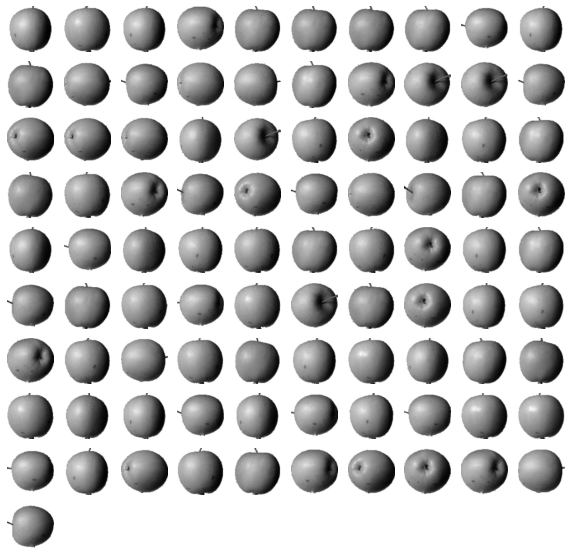

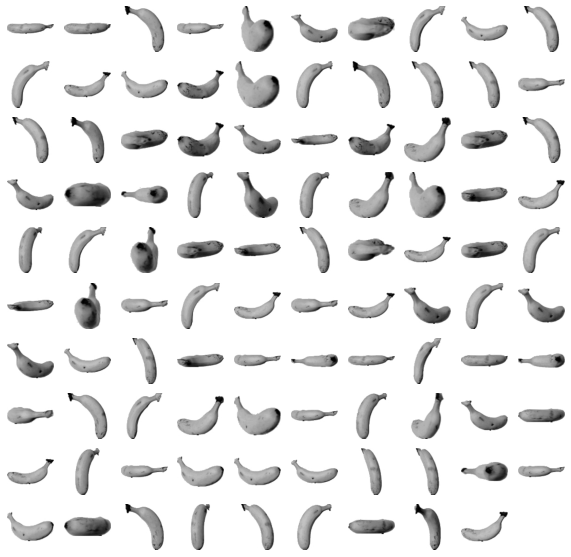

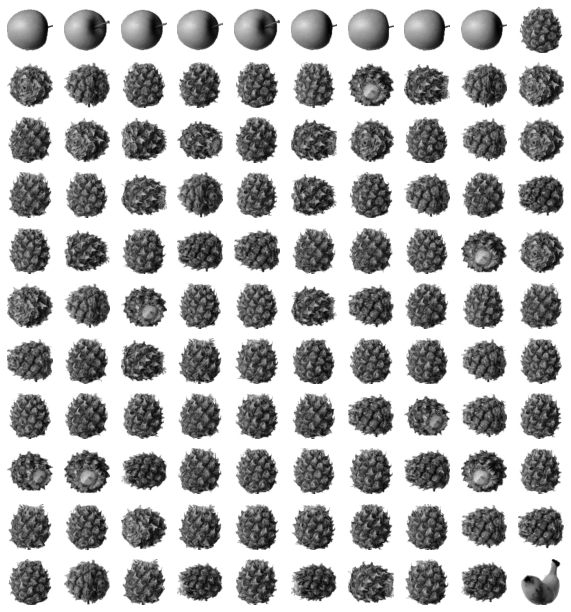

In [130]:
for label in range(0,3):
    draw_fruits(fruits[km.labels_ == label])
    print("\n")

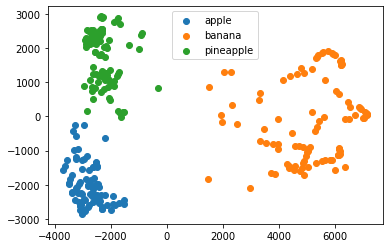

In [131]:
for label in range(0,3):
    data = fruits_pca[km.labels_ == label]
    plt.scatter(data[:,0], data[:,1])
plt.legend(['apple', 'banana', 'pineapple'])
plt.show()

차원 축소를 하면 시각화를 하기 더 쉽다!

( 특성이 2개이므로 2차원에 표현할 수가 있다 )